In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.datasets import make_moons, make_swiss_roll, load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from time import time
from sklearn.metrics import pairwise
from numpy.random import seed
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
#moon dataset

x_moon, y_moon = make_moons(n_samples=5000, noise=0.09, random_state=69)
seed(300)

In [3]:
#iris dataset

x_iris = load_iris().data
y_iris = load_iris().target

In [4]:
x_moon.shape

(5000, 2)

In [5]:
x_iris.shape

(150, 4)

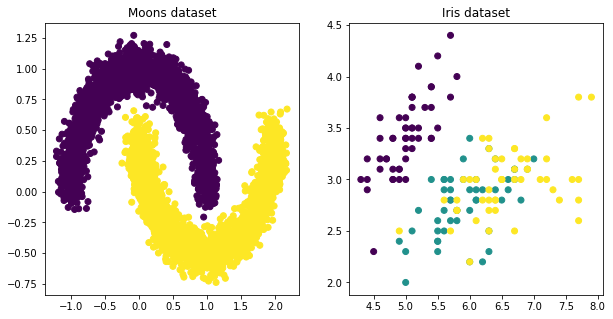

In [7]:
#visualisations of moon and iris datasets

f,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x_moon[:,0], x_moon[:,1], c = y_moon)
ax1.set_title('Moons dataset')
ax2.set_title('Iris dataset')
ax2.scatter(x_iris[:,0], x_iris[:,1], c = y_iris)
plt.savefig("datasets", bbox_inches='tight',dpi = 200)

In [6]:
#kmeans function

def kmeans(x,k,kernel,c=0,iters=500):
  seed(7)
  if kernel == "None":
    x1 = x
  elif kernel == "RBF":
    x1 = pairwise.rbf_kernel(x,gamma=c)
  elif kernel == "Polynomial":
    x1 = pairwise.polynomial_kernel(x,degree=c)
  elif kernel == "LaPlacian":
    x1 = pairwise.laplacian_kernel(x,gamma=c)
  elif kernel == "Sigmoid":
    x1 = pairwise.sigmoid_kernel(x,gamma=c)
  centroids = x1[np.random.choice(len(x1), k), :]
  labels = np.argmin(distance.cdist(x1, centroids, 'euclidean'),axis=1)
  for j in range(iters):
      centroids = np.vstack([x1[labels==i,:].mean(axis=0) for i in range(k)])
      temp = np.argmin(distance.cdist(x1, centroids, 'euclidean'),axis=1)
      if np.array_equal(labels,temp):
        break
      labels = temp
  return labels

In [8]:
#saving results in dataframe

methods = ["None","RBF", "Polynomial", "LaPlacian", "Sigmoid"]
datasets = ["Moon","Iris"]
timedf = pd.DataFrame(index=datasets,columns=methods)
accdf = pd.DataFrame(index=datasets,columns=methods)
sildf = pd.DataFrame(index=datasets,columns=methods)

#rbf 7
#poly 5
#laplacian 4
#sigmoid 1

In [ ]:
def fit(x,y,dataset):
  if dataset == "Moon":
    for i in methods:
      for j in range(1,11):
        acc = []
        temp_labels = kmeans(x,2,i,j)
        acc.append(round(accuracy_score(y,temp_labels)*100))
        acc = np.array(acc)
        gamma_tune = np.argmax(acc)
        t0 = time()
        new_labels = kmeans(x,2,i,gamma_tune)
        t1 = time()
        timedf.loc["Moon",i] = t1-t0
        accdf.loc["Moon",i] = round(accuracy_score(y,new_labels)*100)
  elif dataset == "Iris":
    for i in methods:
      for j in range(1,11):
        acc = []
        temp_labels = kmeans(x,3,i,j)
        acc.append(round(accuracy_score(y,temp_labels)*100))
        acc = np.array(acc)
        gamma_tune = np.argmax(acc)
        t0 = time()
        new_labels = kmeans(x,3,i,gamma_tune)
        t1 = time()
        timedf.loc["Iris",i] = t1-t0
        accdf.loc["Iris",i] = round(accuracy_score(y,new_labels)*100)

72.0


Text(0.5, 1.0, 'Normal Kmeans, Moon dataset')

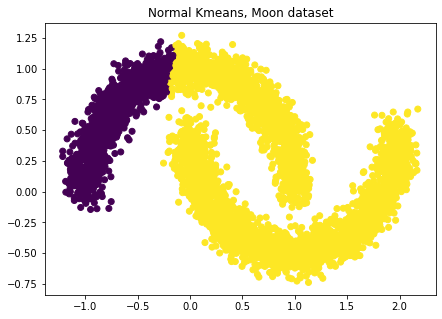

In [45]:
#Moon
i = methods[4]
t0 = time()
new_labels = kmeans(x_moon,2,i,1)
t1 = time()
#timedf.loc["Moon",i] = t1-t0
#accdf.loc["Moon",i] = round(accuracy_score(y_moon,new_labels)*100)
sildf.loc["Moon",i] = silhouette_score(x_moon,new_labels)

print(round(accuracy_score(y_moon,new_labels)*100))
plt.figure(figsize=(7,5))
plt.scatter(x_moon[:,0], x_moon[:,1], c = new_labels)
plt.title("Normal Kmeans, Moon dataset")
#plt.savefig('Moon '+i, bbox_inches='tight',dpi = 200)
#print(silhouette_score(x_moon,new_labels))

#inertia

In [ ]:
new_labels = kmeans(x_moon,2,i,2)

84.0


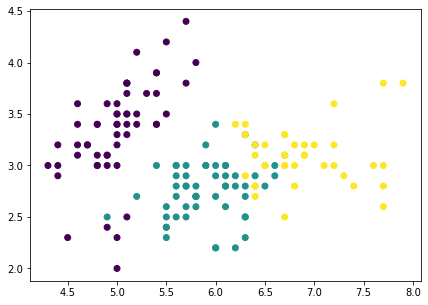

In [50]:
#rbf 1
#poly 3
#lap  1
#sig 0.001

#Iris
i = methods[4]
t0 = time()
new_labels = kmeans(x_iris,3,i,0.001)
t1 = time()
timedf.loc["Iris",i] = t1-t0
accdf.loc["Iris",i] = round(accuracy_score(y_iris,new_labels)*100)
sildf.loc["Iris",i] = silhouette_score(x_iris,new_labels)

print(round(accuracy_score(y_iris,new_labels)*100))
plt.figure(figsize=(7,5))
plt.scatter(x_iris[:,0], x_iris[:,1], c = new_labels)
#plt.title(i + " Kernel, Iris dataset")
#plt.savefig('Iris '+i, bbox_inches='tight',dpi = 200)

In [ ]:
#Spiral
i = methods[1]
t0 = time()
new_labels = kmeans(x_spiral,2,i,0.001)
t1 = time()
timedf.loc["Spiral",i] = t1-t0
accdf.loc["Spiral",i] = round(accuracy_score(y_spiral,new_labels)*100)
print(round(accuracy_score(y_spiral,new_labels)*100))
plt.figure(figsize=(7,5))
plt.scatter(x_spiral[:,0], x_spiral[:,1], c = new_labels)
plt.title("Normal Kmeans, Spiral dataset")
plt.savefig('Spiral '+i, bbox_inches='tight',dpi = 200)

In [19]:
silhouette_score(x_moon,new_labels)

0.4871014537000652

In [55]:
accdf.loc["Moon","Polynomial"] = 100-34

In [56]:
Accuracy scores

,None,RBF,Polynomial,LaPlacian,Sigmoid
Moon,75,98,66,91,72
Iris,89,93,84,93,84


In [52]:
Time

,None,RBF,Polynomial,LaPlacian,Sigmoid
Moon,0.0069809,8.60008,1.99174,8.38646,2.49497
Iris,0.00156617,0.00199556,0.00602889,0.00199556,0.00199223


In [51]:
Silhouette score

,None,RBF,Polynomial,LaPlacian,Sigmoid
Moon,0.487101,0.348479,0.362993,0.419238,0.40948
Iris,0.551192,0.522045,0.522612,0.522045,0.524928


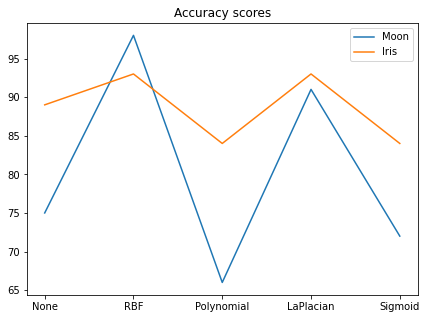

In [65]:
plt.figure(figsize=(7,5))
plt.plot(accdf.iloc[0,:], label ="Moon")
plt.plot(accdf.iloc[1,:], label = "Iris")
plt.legend()
plt.title("Accuracy scores")
plt.savefig("acc", bbox_inches='tight',dpi = 200)

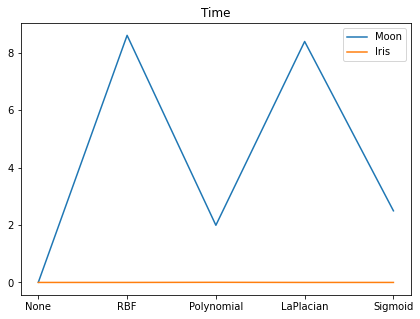

In [66]:
plt.figure(figsize=(7,5))
plt.plot(timedf.iloc[0,:], label ="Moon")
plt.plot(timedf.iloc[1,:], label = "Iris")
plt.legend()
plt.title("Time")
plt.savefig("time", bbox_inches='tight',dpi = 200)

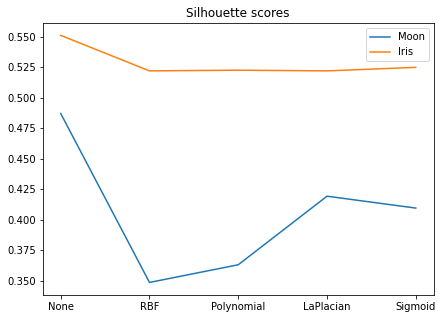

In [67]:
plt.figure(figsize=(7,5))
plt.plot(sildf.iloc[0,:], label ="Moon")
plt.plot(sildf.iloc[1,:], label = "Iris")
plt.legend()
plt.title("Silhouette scores")
plt.savefig("sil", bbox_inches='tight',dpi = 200)